In [1]:
#importar as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests

%matplotlib inline

## Coletar dados 

In [2]:
#ler o arquivo twitter-archive-enhanced.csv e definí-lo como um dataframe chamado df.
df = pd.read_csv('twitter-archive-enhanced.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
#baixar o arquivo das previsões de imagens em tweets programaticamente

folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

with open(os.path.join(folder_name,
                      url.split('/')[-1]), mode='wb') as file:
    file.write(response.content) 

In [4]:
images = pd.read_table('image_predictions/image-predictions.tsv',
                       sep='\t') 

In [5]:
#Consultando os dados do Twitter usando a biblioteca tweepy e armazenando os dados Json do twitter em um arquivo

import tweepy
from tweepy import OAuthHandler
import json
import csv
import sys
import os
import time

#chaves para autenticação
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth, 
                 wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True) 

In [6]:
#consulta de dados do Twitter usando tweet_id

tweet_ids = list(df.tweet_id)

tweet_data = {}
for tweet in tweet_ids:
    try:
        tweet_status = api.get_status(tweet,
                                      wait_on_rate_limit=True, 
                                      wait_on_rate_limit_notify=True)
        tweet_data[str(tweet)] = tweet_status._json
    except: 
        print("Error for: " + str(tweet)) 

Error for: 888202515573088257
Error for: 873697596434513921
Error for: 872668790621863937
Error for: 869988702071779329
Error for: 866816280283807744
Error for: 861769973181624320
Error for: 845459076796616705
Error for: 842892208864923648
Error for: 837012587749474308
Error for: 827228250799742977
Error for: 802247111496568832
Error for: 775096608509886464
Error for: 771004394259247104
Error for: 770743923962707968


Rate limit reached. Sleeping for: 625


Error for: 754011816964026368


Rate limit reached. Sleeping for: 629


In [7]:
import json

with open('tweet_json.txt', 'w', encoding="utf-8") as outfile:  
    json.dump(tweet_data, outfile, 
              sort_keys = True,
              indent=4,
              ensure_ascii = False) 

In [8]:
tweet_df = pd.read_json('tweet_json.txt',orient='index') 

In [9]:
json_tweet = pd.DataFrame(tweet_data, columns = ['tweet_id', 'favorites', 'retweets', 'user_followers', 'user_favorites', 'date_time'])
json_tweet.to_csv('tweet_json.txt', encoding= 'utf-8', index= False) 

## Avaliar dados

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
tweet_df.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2341 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2341 non-null datetime64[ns]
entities                         2341 non-null object
extended_entities                1822 non-null object
favorite_count                   2341 non-null int64
favorited                        2341 non-null int64
geo                              0 non-null float64
id                               2341 non-null int64
id_str                           2341 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
is_quote_status                  23

## Problemas de qualidade 

-  P1, P2 e P3 no dataframe Images com sublinhado entre alguns nomes (images_clean)
-  Alguns nomes em P1, P2 e P3 não começam com letra maiúscula (images_clean)
-  Numeradores de classificação com casas decimais não sendo do tipo float (Df_clean)
-  Converter a coluna tweet_id para string (tweet_df_clean)
-  Renomear a coluna id no dataframe Tweet_df para tweet_id (tweet_df_clean)
-  Nomes de cachorros escritos erroneamente (df_clean)
-  Colunas desnecessárias em Df (df_clean)
-  Colunas desnecessárias em Tweet_df_clean
-  Colunas Date and Time precisam ser convertidas para objetos datetime (df_clean)


## Problemas de arrumação

-  Combinar as colunas (doggo, floofer, pupper, puppo) em uma única coluna Stage (df_clean)
-  agrupar todas as tabelas (Df, Images, tweet_df) usando inner join


## Limpeza

In [13]:
df_clean = df.copy()
images_clean = images.copy()
tweet_df_clean = tweet_df.copy() 

### DF_clean

#### Definir: Converter coluna Timestamp para Datetime objects 

#### Código

In [14]:
from datetime import datetime,timedelta
type(df_clean['timestamp'].iloc[0])

str

In [15]:
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

df_clean['date'] = df_clean['timestamp'].apply(lambda time: time.strftime('%m-%d-%Y'))
df_clean['time'] = df_clean['timestamp'].apply(lambda time: time.strftime('%H:%M'))

#### Testar

In [16]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,08-01-2017,16:23
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,08-01-2017,00:17
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,07-31-2017,00:18
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,07-30-2017,15:58
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,07-29-2017,16:00


#### Definir: Corrigir e substituir nomes de cachorros 

#### Código

In [17]:
df_clean['name'].replace('the', 'None', inplace=True)
df_clean['name'].replace("light",'None', inplace=True)
df_clean['name'].replace("life",'None', inplace=True)
df_clean['name'].replace("an",'None', inplace=True)
df_clean['name'].replace("a",'None', inplace=True)
df_clean['name'].replace("by",'None', inplace=True)
df_clean['name'].replace("actually",'None', inplace=True)
df_clean['name'].replace("just",'None', inplace=True)
df_clean['name'].replace("getting",'None', inplace=True) 
df_clean['name'].replace("infuriating",'None', inplace=True) 
df_clean['name'].replace("old",'None', inplace=True) 
df_clean['name'].replace("all",'None', inplace=True) 
df_clean['name'].replace("this",'None', inplace=True) 
df_clean['name'].replace("very",'None', inplace=True) 
df_clean['name'].replace("mad",'None', inplace=True) 
df_clean['name'].replace("not",'None', inplace=True)
df_clean['name'].replace("one",'None', inplace=True)
df_clean['name'].replace("my",'None', inplace=True)
df_clean['name'].replace("O","O'Malley", inplace=True)
df_clean['name'].replace("quite","None", inplace=True)
df_clean['name'].replace("such","None", inplace=True)

#### Testar

In [18]:
df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,08-01-2017,16:23
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,08-01-2017,00:17
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,07-31-2017,00:18
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,07-30-2017,15:58
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,07-29-2017,16:00
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,07-29-2017,00:08
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,07-28-2017,16:27
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,07-28-2017,00:22
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,07-27-2017,16:25
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,07-26-2017,15:59


#### Definir: Combinar as colunas (doggo, floofer, pupper, puppo) em uma única coluna Stage 

#### Código

In [19]:
df_clean['stage'] = df_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

In [20]:
columns = ['doggo', 'floofer', 'pupper', 'puppo']
df_clean = df_clean.drop(columns, axis=1) 

#### Testar

In [21]:
df_clean.head() 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,date,time,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,08-01-2017,16:23,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,08-01-2017,00:17,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,07-31-2017,00:18,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,07-30-2017,15:58,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,07-29-2017,16:00,NaN


#### Definir: remover colunas desnecessárias

#### Código

In [22]:
df_clean.drop(['timestamp',
               'retweeted_status_user_id',
               'retweeted_status_id',
               'retweeted_status_timestamp',
               'in_reply_to_status_id',
               'in_reply_to_user_id',
               'in_reply_to_status_id',
               'expanded_urls',
               'source',
               'text'], axis=1,inplace=True)

#### Testar

In [23]:
df_clean.head()

,tweet_id,rating_numerator,rating_denominator,name,date,time,stage
0,892420643555336193,13,10,Phineas,08-01-2017,16:23,NaN
1,892177421306343426,13,10,Tilly,08-01-2017,00:17,NaN
2,891815181378084864,12,10,Archie,07-31-2017,00:18,NaN
3,891689557279858688,13,10,Darla,07-30-2017,15:58,NaN
4,891327558926688256,12,10,Franklin,07-29-2017,16:00,NaN


#### Definir: Rating numerator e rating denominator devem ser convertidos para o tipo Float 

#### Código 

In [24]:
df_clean['rating_numerator'] = df_clean['rating_numerator'].astype(float)
df_clean['rating_denominator'] = df_clean['rating_denominator'].astype(float)

#### Testar 

In [25]:
type(df_clean['rating_numerator'].iloc[0]) 

numpy.float64

#### Definir: converter a coluna Tweet_id para string 

#### Código

In [26]:
df_clean.tweet_id = df_clean.tweet_id.astype(str) 

#### Testar

In [27]:
type(df_clean['tweet_id'].iloc[0])

str

### Tweet_df_clean

#### Definir: renomear a coluna Id para Tweet_id, para ficar com o mesmo nome que os outros dataframes.

#### Código

In [28]:
tweet_df_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

#### Testar 

In [29]:
tweet_df_clean.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,tweet_id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2548,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,508,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,129,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,47,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 17:16:52.701032449,NaN,NaN,2015-11-15 23:21:54,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/y6...,125,0,NaN,666033412701032448,666033412701032448,...,NaN,NaN,NaN,44,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 20:17:06.329800704,NaN,NaN,2015-11-16 00:04:52,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/DW...,296,0,NaN,666044226329800704,666044226329800704,...,NaN,NaN,NaN,139,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 21:40:48.165822465,NaN,NaN,2015-11-16 00:24:50,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/4B...,107,0,NaN,666049248165822464,666049248165822464,...,NaN,NaN,NaN,40,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,0,"{'contributors_enabled': False, 'created_at': ..."


#### Definir: converter Tweet_id para string

#### Código

In [30]:
tweet_df_clean.tweet_id = tweet_df_clean.tweet_id.astype(str)

#### Testar

In [31]:
type(tweet_df_clean['tweet_id'].iloc[0])

str

#### Definir: Remover colunas desnecessárias 

#### Código

In [32]:
tweet_df_clean.drop(['contributors',
                     'coordinates',
                     'created_at',
                     'entities',
                     'extended_entities',
                     'favorited',
                     'geo',
                     'id_str',
                     'in_reply_to_screen_name',
                     'in_reply_to_status_id',
                     'in_reply_to_status_id_str',
                     'in_reply_to_user_id',
                     'in_reply_to_user_id_str',
                     'is_quote_status',
                     'lang',
                     'place',
                     'possibly_sensitive',
                     'possibly_sensitive_appealable',
                     'quoted_status',
                     'quoted_status_id',
                     'quoted_status_id_str',
                     'retweeted',
                     'retweeted_status',
                     'source',
                     'truncated',
                     'user'], axis=1,inplace=True) 

### Images_clean

#### Definir: substituir o sublinhado por espaço em P1, P2 e P3.
#### Código

In [33]:
images_clean['p1'] = images_clean['p1'].str.replace('_', ' ')
images_clean['p2'] = images_clean['p2'].str.replace('_', ' ')
images_clean['p3'] = images_clean['p3'].str.replace('_', ' ') 

#### Testar

In [34]:
images_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Definir: Capitalizar os nomes em P1,P2 e P3

#### Código

In [35]:
images_clean['p1'] = images_clean['p1'].str.title()
images_clean['p2'] = images_clean['p2'].str.title()
images_clean['p3'] = images_clean['p3'].str.title()

#### Testar

In [36]:
images_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Definir: converter a coluna tweet_id para string

#### Código

In [37]:
images_clean.tweet_id = images_clean.tweet_id.astype(str)

#### Testar 

In [38]:
type(images_clean['tweet_id'].iloc[0])

str

#### Definir: Combinar os três dataframes usando inner join 

#### Código

In [39]:
df_merge = pd.merge(df_clean, tweet_df_clean,on='tweet_id', how='inner') 

In [40]:
df_merge = pd.merge(df_merge, images_clean,on='tweet_id', how='inner')

#### Testar 

In [41]:
df_merge

,tweet_id,rating_numerator,rating_denominator,name,date,time,stage,favorite_count,retweet_count,text,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,891815181378084864,12.0,10.0,Archie,07-31-2017,00:18,NaN,24716,4100,This is Archie. He is a rare Norwegian Pouncin...,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
1,891689557279858688,13.0,10.0,Darla,07-30-2017,15:58,NaN,41622,8528,This is Darla. She commenced a snooze mid meal...,...,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
2,891327558926688256,12.0,10.0,Franklin,07-29-2017,16:00,NaN,39791,9243,This is Franklin. He would like you to stop ca...,...,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True
3,891087950875897856,13.0,10.0,None,07-29-2017,00:08,NaN,19982,3074,Here we have a majestic great white breaching ...,...,1,Chesapeake Bay Retriever,0.425595,True,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False
4,890729181411237888,13.0,10.0,None,07-28-2017,00:22,NaN,64633,18636,When you watch your owner call another dog a g...,...,2,Pomeranian,0.566142,True,Eskimo Dog,0.178406,True,Pembroke,0.076507,True
5,890609185150312448,13.0,10.0,Zoey,07-27-2017,16:25,NaN,27461,4215,This is Zoey. She doesn't want to be one of th...,...,1,Irish Terrier,0.487574,True,Irish Setter,0.193054,True,Chesapeake Bay Retriever,0.118184,True
6,890006608113172480,13.0,10.0,Koda,07-26-2017,00:31,NaN,30279,7239,This is Koda. He is a South Australian decksha...,...,1,Samoyed,0.957979,True,Pomeranian,0.013884,True,Chow,0.008167,True
7,889638837579907072,12.0,10.0,Ted,07-25-2017,00:10,NaN,26827,4486,This is Ted. He does his best. Sometimes that'...,...,1,French Bulldog,0.991650,True,Boxer,0.002129,True,Staffordshire Bullterrier,0.001498,True
8,889278841981685760,13.0,10.0,Oliver,07-24-2017,00:19,NaN,24932,5315,This is Oliver. You're witnessing one of his m...,...,1,Whippet,0.626152,True,Borzoi,0.194742,True,Saluki,0.027351,True
9,888917238123831296,12.0,10.0,Jim,07-23-2017,00:22,NaN,28716,4442,This is Jim. He found a fren. Taught him how t...,...,1,Golden Retriever,0.714719,True,Tibetan Mastiff,0.120184,True,Labrador Retriever,0.105506,True


### Armazenando, analisando e visualizando dados para este projeto 

In [42]:
folder_name = 'Documentos_finais'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
df_clean.to_csv('Documentos_finais/twitter_archive_master.csv')
images_clean.to_csv('Documentos_finais/image_prediction_master.csv')
tweet_df_clean.to_csv('Documentos_finais/tweet_query_master.csv')
df_merge.to_csv('Documentos_finais/final_master.csv') 

In [43]:
df_master= pd.read_csv('Documentos_Finais/final_master.csv')
image_pred_df = pd.read_csv('Documentos_finais/image_prediction_master.csv') 

In [44]:
df_master.head()

,Unnamed: 0,tweet_id,rating_numerator,rating_denominator,name,date,time,stage,favorite_count,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,0,891815181378084864,12.0,10.0,Archie,07-31-2017,00:18,NaN,24716,4100,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
1,1,891689557279858688,13.0,10.0,Darla,07-30-2017,15:58,NaN,41622,8528,...,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
2,2,891327558926688256,12.0,10.0,Franklin,07-29-2017,16:00,NaN,39791,9243,...,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True
3,3,891087950875897856,13.0,10.0,None,07-29-2017,00:08,NaN,19982,3074,...,1,Chesapeake Bay Retriever,0.425595,True,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False
4,4,890729181411237888,13.0,10.0,None,07-28-2017,00:22,NaN,64633,18636,...,2,Pomeranian,0.566142,True,Eskimo Dog,0.178406,True,Pembroke,0.076507,True


#### Definir

-  Retirar a coluna 'Unnamed:0'
-  converter a coluna 'tweet_id' para string

#### Código

In [45]:
df_master.drop(['Unnamed: 0'],axis=1,inplace=True)
df_master.tweet_id = df_master.tweet_id.astype(str) 

#### Testar 

In [46]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345 entries, 0 to 1344
Data columns (total 21 columns):
tweet_id              1345 non-null object
rating_numerator      1345 non-null float64
rating_denominator    1345 non-null float64
name                  1345 non-null object
date                  1345 non-null object
time                  1345 non-null object
stage                 216 non-null object
favorite_count        1345 non-null int64
retweet_count         1345 non-null int64
text                  1345 non-null object
jpg_url               1345 non-null object
img_num               1345 non-null int64
p1                    1345 non-null object
p1_conf               1345 non-null float64
p1_dog                1345 non-null bool
p2                    1345 non-null object
p2_conf               1345 non-null float64
p2_dog                1345 non-null bool
p3                    1345 non-null object
p3_conf               1345 non-null float64
p3_dog                1345 non-null 

#### Análise

Podemos analisar a correlação entre favorite_count e retweet_count

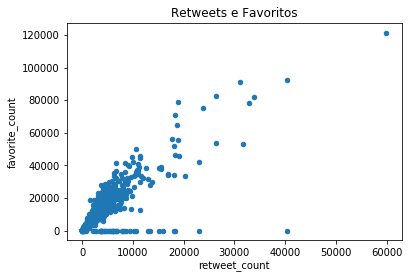

In [47]:
df_master.plot.scatter('retweet_count', 'favorite_count')
plt.title("Retweets e Favoritos")
plt.savefig('retfavscatter.png') 

In [48]:
df_master.corr()

,rating_numerator,rating_denominator,favorite_count,retweet_count,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog
rating_numerator,1.000000,0.174622,0.015354,0.019180,-0.004277,-0.014702,-0.044392,-0.024454,-0.051178,-0.007630,-0.041837
rating_denominator,0.174622,1.000000,-0.027123,-0.021729,-0.002197,-0.017157,-0.018068,-0.042569,-0.020895,-0.006186,0.005697
favorite_count,0.015354,-0.027123,1.000000,0.823669,0.131372,0.087605,0.074227,-0.007890,0.088378,-0.045223,0.049512
retweet_count,0.019180,-0.021729,0.823669,1.000000,0.099435,0.059719,0.023040,-0.006176,0.053624,-0.034861,0.008385
img_num,-0.004277,-0.002197,0.131372,0.099435,1.000000,0.170700,0.054022,-0.133627,0.058567,-0.098792,0.078050
p1_conf,-0.014702,-0.017157,0.087605,0.059719,0.170700,1.000000,0.135893,-0.506171,0.128327,-0.696854,0.129343
p1_dog,-0.044392,-0.018068,0.074227,0.023040,0.054022,0.135893,1.000000,0.095773,0.643598,0.042371,0.574438
p2_conf,-0.024454,-0.042569,-0.007890,-0.006176,-0.133627,-0.506171,0.095773,1.000000,0.098010,0.475553,0.056456
p2_dog,-0.051178,-0.020895,0.088378,0.053624,0.058567,0.128327,0.643598,0.098010,1.000000,0.040729,0.576305
p3_conf,-0.007630,-0.006186,-0.045223,-0.034861,-0.098792,-0.696854,0.042371,0.475553,0.040729,1.000000,0.031245


Uma forte correlação entre favorite_count e retweet_count é perceptível. Quando os tweets favoritos aumentam, o número de retweets também aumenta e vice-versa. Parece que eles têm um relacionamento não linear.

### Análise

Quais são os 10 nomes de cachorros mais comuns? 

In [49]:
from collections import Counter

x = df_master['name']
count = Counter(x)
count.most_common(10) 

[('None', 453),
 ('Oliver', 8),
 ('Winston', 7),
 ('Tucker', 7),
 ('Bailey', 6),
 ('Penny', 6),
 ('Cooper', 6),
 ('Lucy', 6),
 ('Bella', 5),
 ('Toby', 5)]

Os 10 nomes mais populares são Oliver, Winston, Tucker, Bailey, Penny, Cooper, Lucy, Bella e Toby.

#### Análise 

Qual o cachorro com o maior número de retweet_count? 

In [50]:
df_master.describe()

,rating_numerator,rating_denominator,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf
count,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1.345000e+03,1.345000e+03
mean,12.807435,10.527138,7927.521190,2646.639405,1.186617,0.588745,1.369823e-01,6.130587e-02
std,50.265879,7.739204,11329.459598,4239.330538,0.538792,0.272383,1.018922e-01,5.179391e-02
min,1.000000,2.000000,0.000000,12.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.000000,1478.000000,578.000000,1.000000,0.360159,5.433560e-02,1.648340e-02
50%,11.000000,10.000000,3602.000000,1275.000000,1.000000,0.583122,1.205300e-01,4.944380e-02
75%,12.000000,10.000000,9828.000000,3144.000000,1.000000,0.836572,1.978610e-01,9.472660e-02
max,1776.000000,170.000000,121304.000000,59962.000000,4.000000,1.000000,4.676780e-01,2.710420e-01


In [53]:
df_master[df_master['retweet_count']==59962]

,tweet_id,rating_numerator,rating_denominator,name,date,time,stage,favorite_count,retweet_count,text,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
249,807106840509214720,13.0,10.0,Stephan,12-09-2016,06:17,NaN,121304,59962,This is Stephan. He just wants to help. 13/10 ...,...,1,Chihuahua,0.50537,True,Pomeranian,0.120358,True,Toy Terrier,0.077008,True
